# Object classiciation on OpenCL-compatible GPUs
APOC is based on [pyclesperanto](https://github.com/clEsperanto/pyclesperanto_prototype) and [sklearn](https://scikit-learn.org/stable/). For object segmentation, it uses a pixel classifier and connected components labeling.

Let's start with loading an example image and some ground truth:

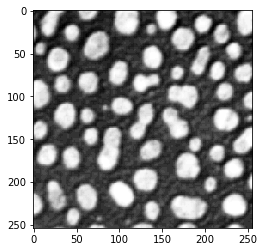

In [1]:
from skimage.io import imread, imsave
import pyclesperanto_prototype as cle
import numpy as np
import apoc

image = imread('../../data/blobs.tif')
cle.imshow(image, color_map="Greys_r")

For object classifcation, we need a label image as input as well.

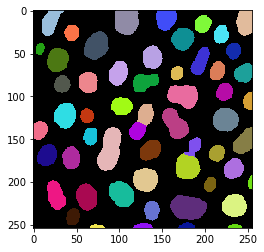

In [2]:
segmentation_result = cle.voronoi_otsu_labeling(image, spot_sigma=6)

cle.imshow(segmentation_result, labels=True)

## Training

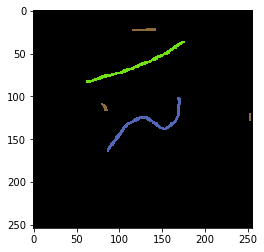

In [3]:
annotation = cle.push(imread('../../data/label_annotation.tif'))

cle.imshow(annotation, labels=True)

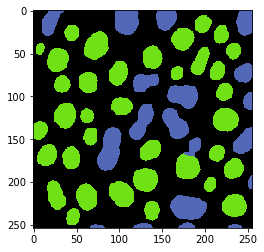

In [4]:
features = 'area,mean_max_distance_to_centroid_ratio,standard_deviation_intensity'

# Create an object classifier
classifier = apoc.ObjectClassifier("object_classifier.cl")

# train it
classifier.train(features, segmentation_result, annotation, image)

# determine object classification
classification_result = classifier.predict(segmentation_result, image)

cle.imshow(classification_result, labels=True)